In [ ]:
"""
!pip install Pillow
"""

In [ ]:
"""
!pip install importnb
import importnb
with __import__('importnb').Notebook():
    from Observe_HessianMatrix import Observe_HessianMatrix
"""

In [ ]:
"""
Cording Plan



Purpose1
固有vector可視化: ndarray [-1, 1]
1step拡散の画像可視化: tensor [-1, 1]




"""

In [1]:
%cd /content/drive/MyDrive/local_repo_all/Research_repo

/content/drive/MyDrive/local_repo_all/Research_repo


In [1]:
#@title moduleのパス追加
import sys
sys.path.append('/content/drive/MyDrive/local_repo_all/Research_repo/my-submodule')
sys.path.append('/content/drive/MyDrive/local_repo_all/Research_repo/my_modules')

In [3]:
#@title import
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import torch
import torchvision

In [4]:
B = np.load('/content/drive/MyDrive/local_repo_all/Research_repo/obs_he/Bnew_all/B_100_9.npy')

In [5]:
print(f'{B.shape=}')

B.shape=(3072, 3072)


In [6]:
values, vectors = np.linalg.eig(B)

In [7]:
print(f'{values.shape=}')
print(f'{vectors.shape=}')
print(f'{B.shape=}')

values.shape=(3072,)
vectors.shape=(3072, 3072)
B.shape=(3072, 3072)


In [9]:
#@title 固有値と固有ベクトルのソート

# 固有値を昇順でソートし、その順序に合わせて固有ベクトルもソート
sorted_indices = np.argsort(values)
sorted_eigenvalues = values[sorted_indices]
sorted_eigenvectors = vectors[:, sorted_indices]

In [8]:
np.set_printoptions(precision=2, suppress=True)

In [10]:
sorted_eigenvalues

array([-3573.12,     0.38,     0.39, ...,   448.68,   462.79,   557.1 ])

In [13]:
""" mean & std """
print(f'{sorted_eigenvectors[:, 0].mean()=:.3f}')
print(f'{sorted_eigenvectors[:, 0].std()=:.3f}')

sorted_eigenvectors[:, 0].mean()=0.000
sorted_eigenvectors[:, 0].std()=0.018


In [41]:
#@title 描画
img = sorted_eigenvectors[:, 255]
# numpy -> PIL image
n = np.reshape(img, [3, 32, 32])
print(n.shape)
# [C, H, W]から[H, W, C]に順序を変更
p = np.transpose(n, (1, 2, 0))
# 値の範囲を[-1, 1] から[0, 255] にスケーリング
img = (((p+1)/2) * 255).astype(np.uint8)
# PIL Imageに変換
pil_img = Image.fromarray(img)

(3, 32, 32)


In [42]:
print(img)

[[[130 134 126]
  [125 131 122]
  [127 127 124]
  ...
  [123 126 128]
  [123 126 128]
  [123 128 129]]

 [[127 132 128]
  [123 124 121]
  [129 129 128]
  ...
  [125 128 129]
  [126 129 126]
  [125 129 131]]

 [[124 130 128]
  [123 124 124]
  [126 123 126]
  ...
  [128 127 129]
  [122 124 125]
  [124 125 125]]

 ...

 [[127 129 126]
  [128 128 128]
  [130 129 129]
  ...
  [126 126 126]
  [130 128 127]
  [130 127 131]]

 [[129 127 125]
  [130 126 128]
  [128 128 128]
  ...
  [124 122 123]
  [124 126 124]
  [125 123 125]]

 [[127 127 125]
  [128 128 127]
  [129 127 130]
  ...
  [125 125 127]
  [125 126 127]
  [125 127 126]]]


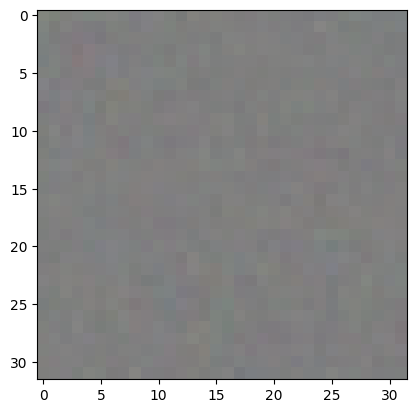

In [43]:
plt.imshow(pil_img)

In [ ]:
""" tensor -> PIL image """

In [ ]:
tensor_path = '/content/drive/MyDrive/local_repo_all/Research_repo/Data_tobe_loaded/x0_sample.pt'
img_tensor = torch.squeeze(torch.load(tensor_path))


In [ ]:
tensor_path = '/content/drive/MyDrive/local_repo_all/Research_repo/obs_he/perx/plural_per100.pth'
img_ten = torch.load(tensor_path, map_location=torch.device('cpu'))
img_tensor = img_ten[0]

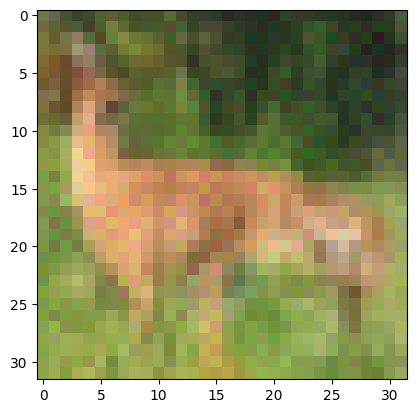

In [ ]:
img_pil = torchvision.transforms.functional.to_pil_image(img_tensor)
img_pil.size
plt.imshow(np.array(img_pil))

In [ ]:
"""
x = torch.load('/content/drive/MyDrive/local_repo_all/Research_repo/Data_tobe_loaded/x0_sample.pt')
x = torch.reshape(torch.flatten(x), (-1, 1)).to('cpu').detach().numpy().copy()
"""

In [21]:
#@title 正規化
def normalize_vector(v):
    norm = np.linalg.norm(v)
    if norm == 0:
       return v
    return v / norm

In [ ]:
print(f'{np.linalg.norm(sorted_eigenvectors)=}')

In [22]:
img_eigvec = normalize_vector(sorted_eigenvectors)

np.linalg.norm(sorted_eigenvectors)=55.425625842204084


In [ ]:
# img = sorted_eigenvectors[:, 0]
img_eigvec0 = img_eigvec[:, 0]
img_eigvec255 = img_eigvec[:, 255]


In [ ]:
for i in range(100):
  for j in range(100):
    print(f'{sorted_eigenvectors[j, i]=}')

In [ ]:
print(f'{img_eigvec0=}\n{img_eigvec255=}')

img_eigvec0=array([-0., -0., -0., ..., -0.,  0.,  0.])
img_eigvec255=array([-0., -0., -0., ..., -0.,  0.,  0.])


In [ ]:
for i in range(255):
  print(f'{img_eigvec[:, i].max()=}')
